###Use Open Source Data Set for Wine Quality Test. We will use features available to classify the Wine dataset based on similaity and then use the result to predict the quality of any new Wine.


### Red wine quality and style are highly influenced by the qualitative and quantitative composition of aromatic compounds having various chemical structures and properties and their interaction within different red wine matrices. The understanding of interactions between the wine matrix and volatile compounds and the impact on the overall flavor as well as on typical or specific aromas is getting more and more important for the creation of certain wine styles.
Source: https://www.sciencedirect.com/topics/food-science/wine-quality


### The goal is to help the consumer and the producer to understand what combination of features and of what quantity will enable to be called a qualifier for a good quality wine.

### Data Source: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import pandas_profiling as pp
%matplotlib inline

In [2]:
# Load the Red Wines dataset
RWdata = pd.read_csv("C:/Users/BalleBalle/Documents/GitHub/Metis/winequality-red.csv", sep=';')

In [3]:
# Let us check the data
RWdata.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Exploratory Data Analysis

In [4]:
# Shape of Data Frame
RWdata.shape

(1599, 12)

In [5]:
#Basic Info on Data Frame
RWdata.info()
# None are string or object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Check for any nulls
RWdata.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
# Basic Statistical data for each column
RWdata.describe()
#Citric Acid has a min value of 0
#Citric acid is generally found in very small quantities in wine grapes. It acts as a preservative and is added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. Excess addition, however, can ruin the taste.
# So it is quite possible.

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

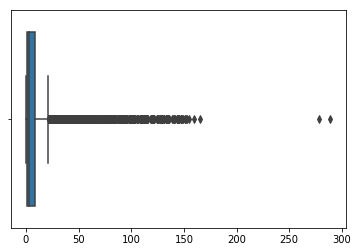

In [8]:
#Check for Outliers
sns.boxplot(x=RWdata)

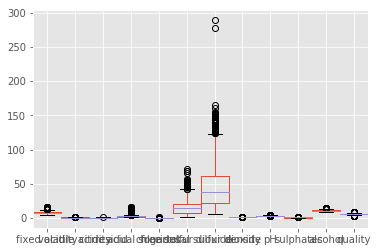

In [9]:
matplotlib.style.use('ggplot')
RWdata.boxplot( widths=1.0)

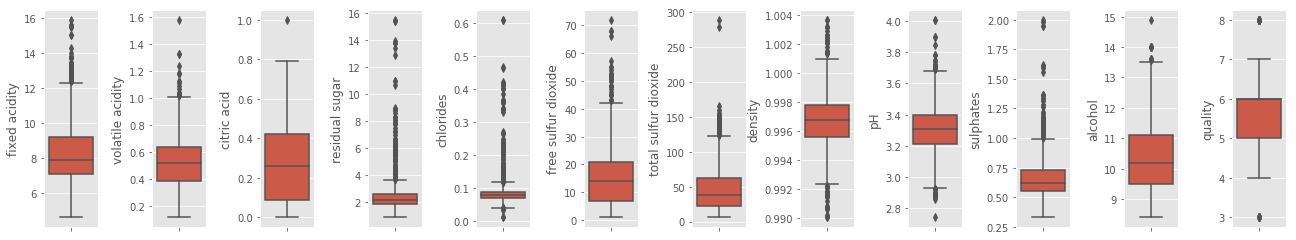

In [10]:
data_to_plot = RWdata.iloc[:, 0:]
fig, ax = plt.subplots(ncols=len(data_to_plot.columns))
plt.subplots_adjust(right=3, wspace=1)
for i, col in enumerate(data_to_plot.columns):
    sns.boxplot(y=data_to_plot[col], ax = ax[i])

In [63]:
#There are outliers in most of the features. Let us validate with histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206A6310320>,
      dtype=object)

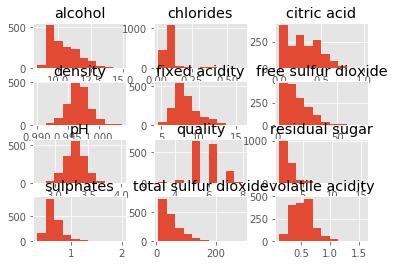

In [11]:
RWdata.hist()

#### From above, Data does not look to be normal, we may have to normalize it.

C:\Users\BalleBalle\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\BalleBalle\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


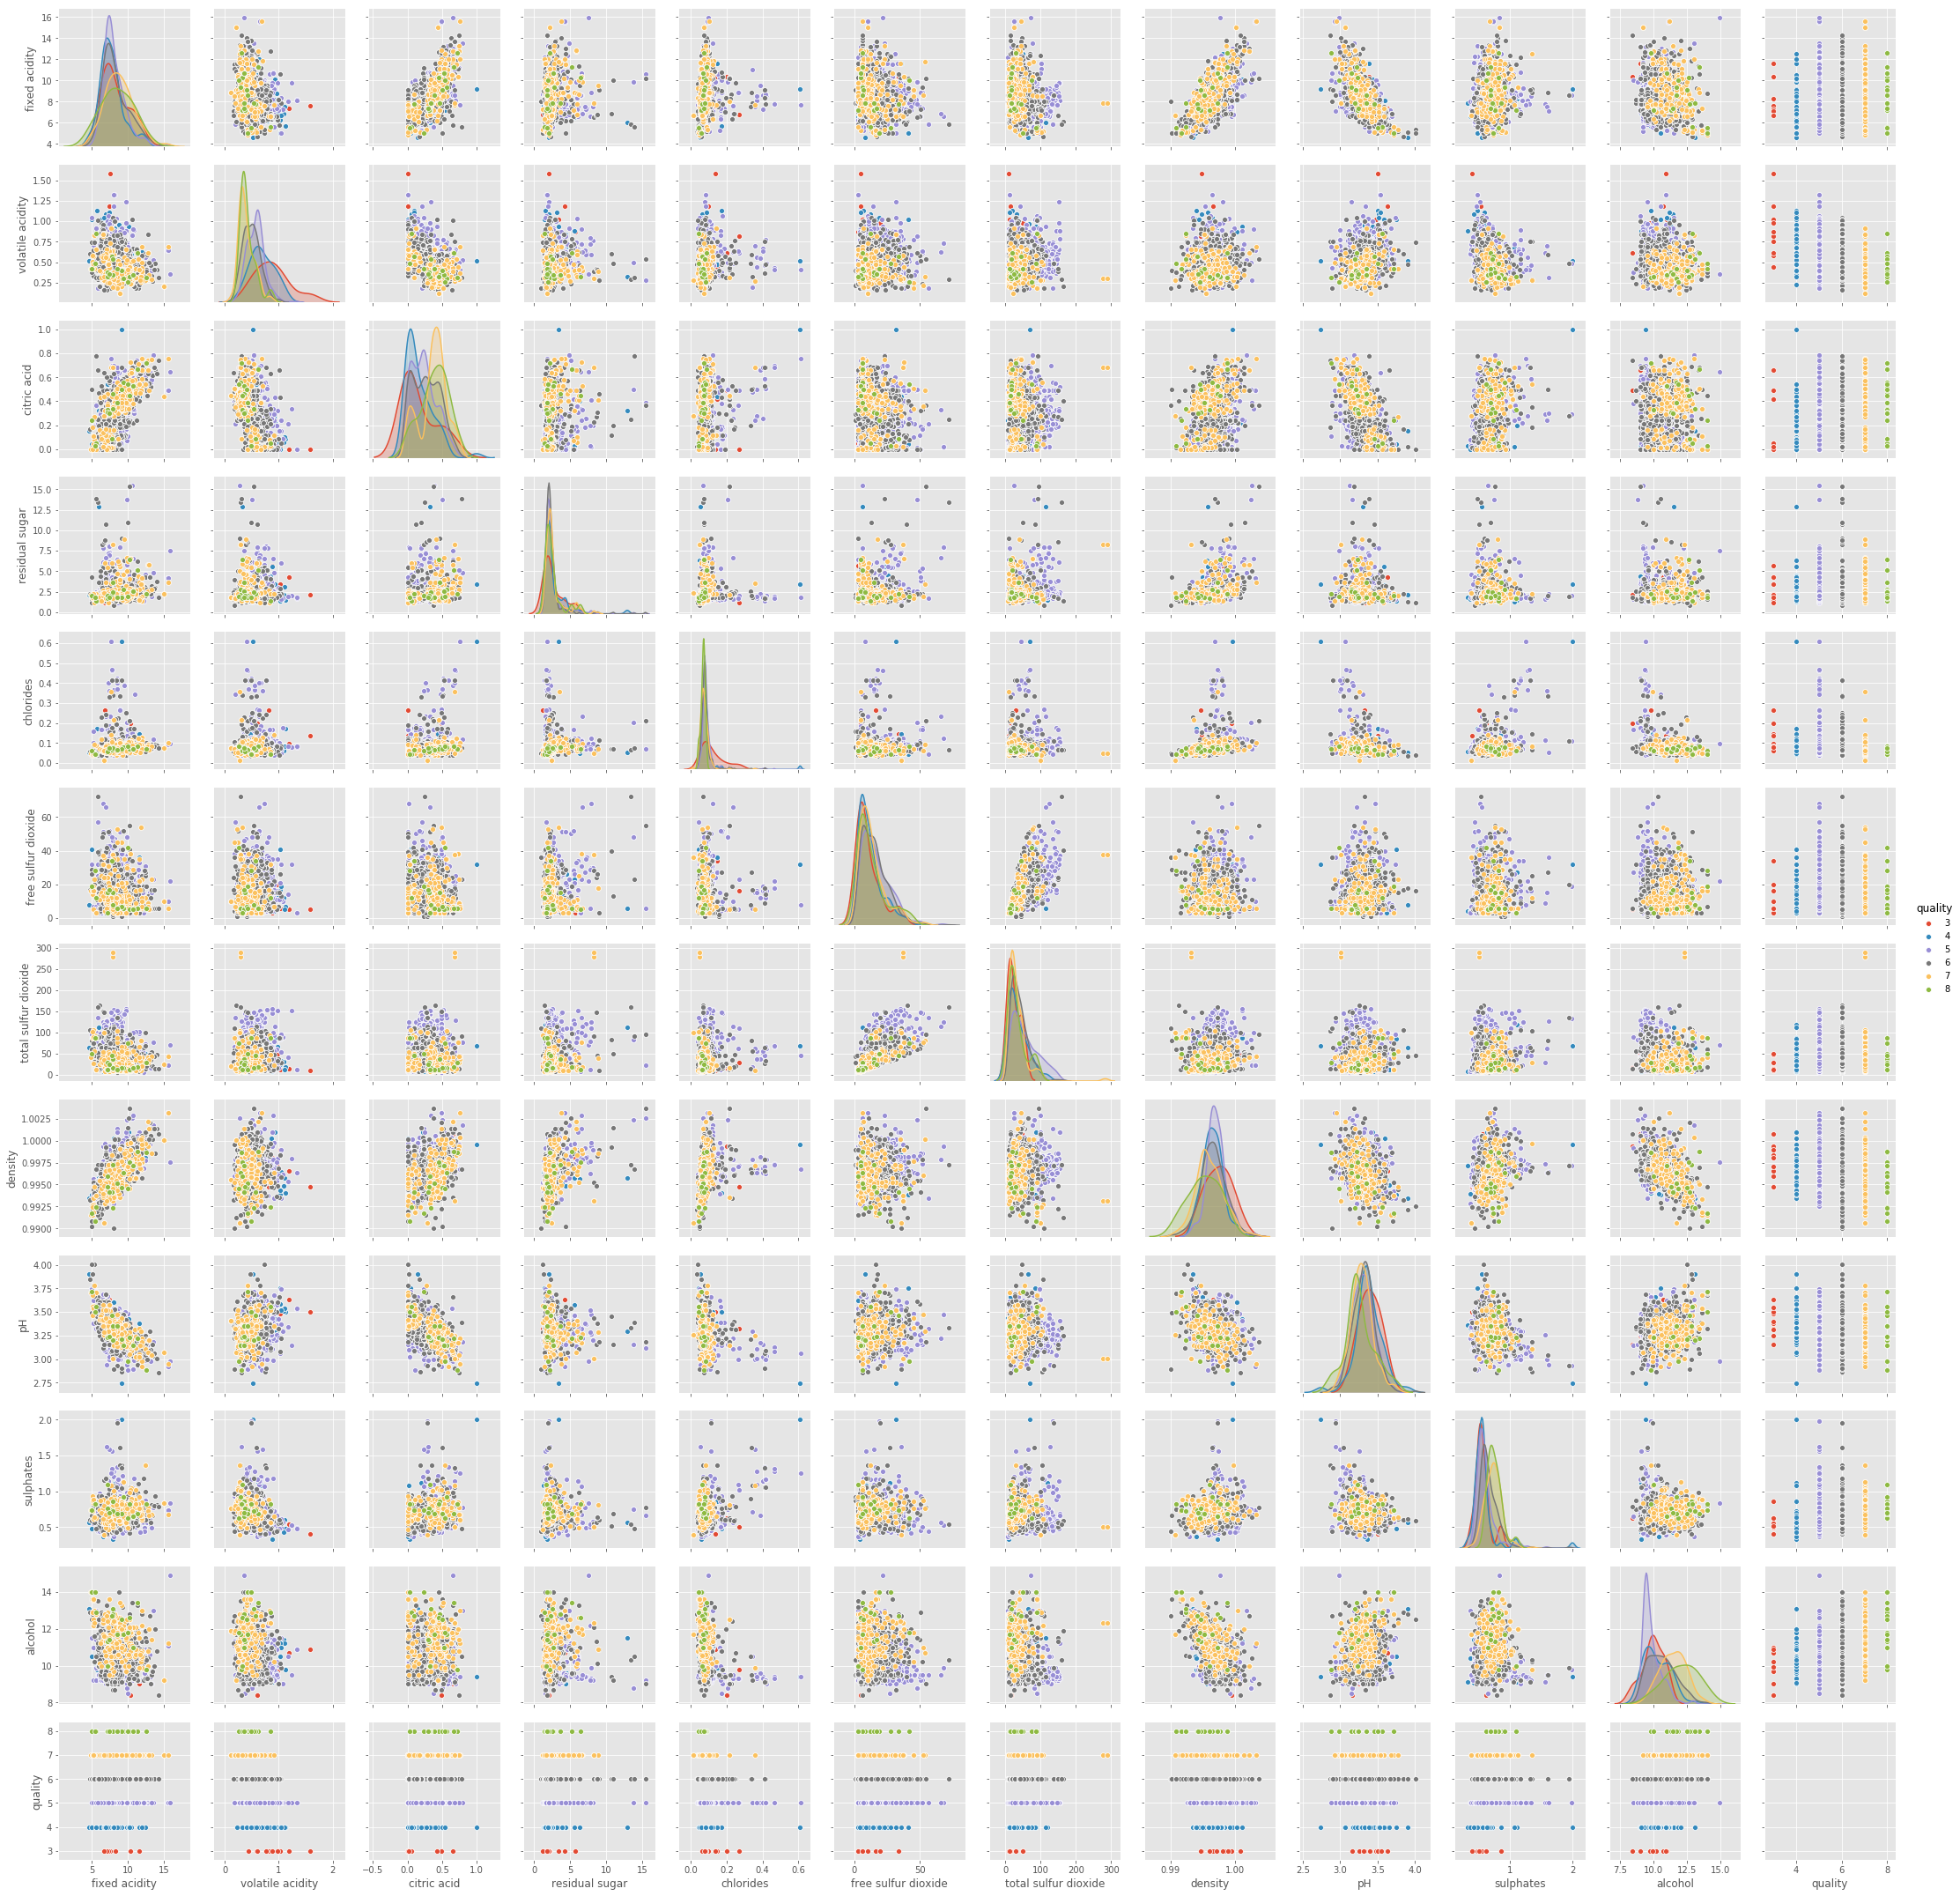

In [12]:
sns.pairplot(RWdata, hue = 'quality')

### We should convert Quality to a categorical value. We can use bins.

In [64]:
bins = [0,5,6, np.inf]
names = [1,2,3]
RWdatabins=RWdata
RWdatabins['Quality Value'] = pd.cut(RWdata['quality'], bins, labels=names)

In [65]:
 RWdatabins

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5             0.500         0.36             6.1      0.071   
12              5.6             0.615         0.00             1.6      0.089   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
16              8.5             0.280         0.56             1.8      0.092   
17              8.1             0.560         0.28             1.7      0.368   
18              7.4             0.590         0.08             4.4      0.086   
19              7.9             0.320         0.51             1.8      0.341   
20              8.9             0.220         0.48             1.8      0.077   
21              7.6             0.390         0.31             2.3      0.082   
22              7.9             0.430         0.21             1.6      0.106   
23              8.5             0.490         0.11             2.3      0.084   
24              6.9             0.400         0.14             2.4      0.085   
25              6.3             0.390         0.16             1.4      0.080   
26              7.6             0.410         0.24             1.8      0.080   
27              7.9             0.430         0.21             1.6      0.106   
28              7.1             0.710         0.00             1.9      0.080   
29              7.8             0.645         0.00             2.0      0.082   
...             ...               ...          ...             ...        ...   
1569            6.2             0.510         0.14             1.9      0.056   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1572            7.3             0.690         0.32             2.2      0.069   
1573            6.0             0.580         0.20             2.4      0.075   
1574            5.6             0.310         0.78            13.9      0.074   
1575            7.5             0.520         0.40             2.2      0.060   
1576            8.0             0.300         0.63             1.6      0.081   
1577            6.2             0.700         0.15             5.1      0.076   
1578            6.8             0.670         0.15             1.8      0.118   
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310

In [66]:
#Drop the original quality column.
# We now have a class of Quality, 1= low, 2=medium and  3=High
RWdatabins=RWdatabins.drop('quality',axis=1)

In [67]:
#Check for datatypes, find any inconsistencies.
RWdatabins.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
Quality Value           category
dtype: object

C:\Users\BalleBalle\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\BalleBalle\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


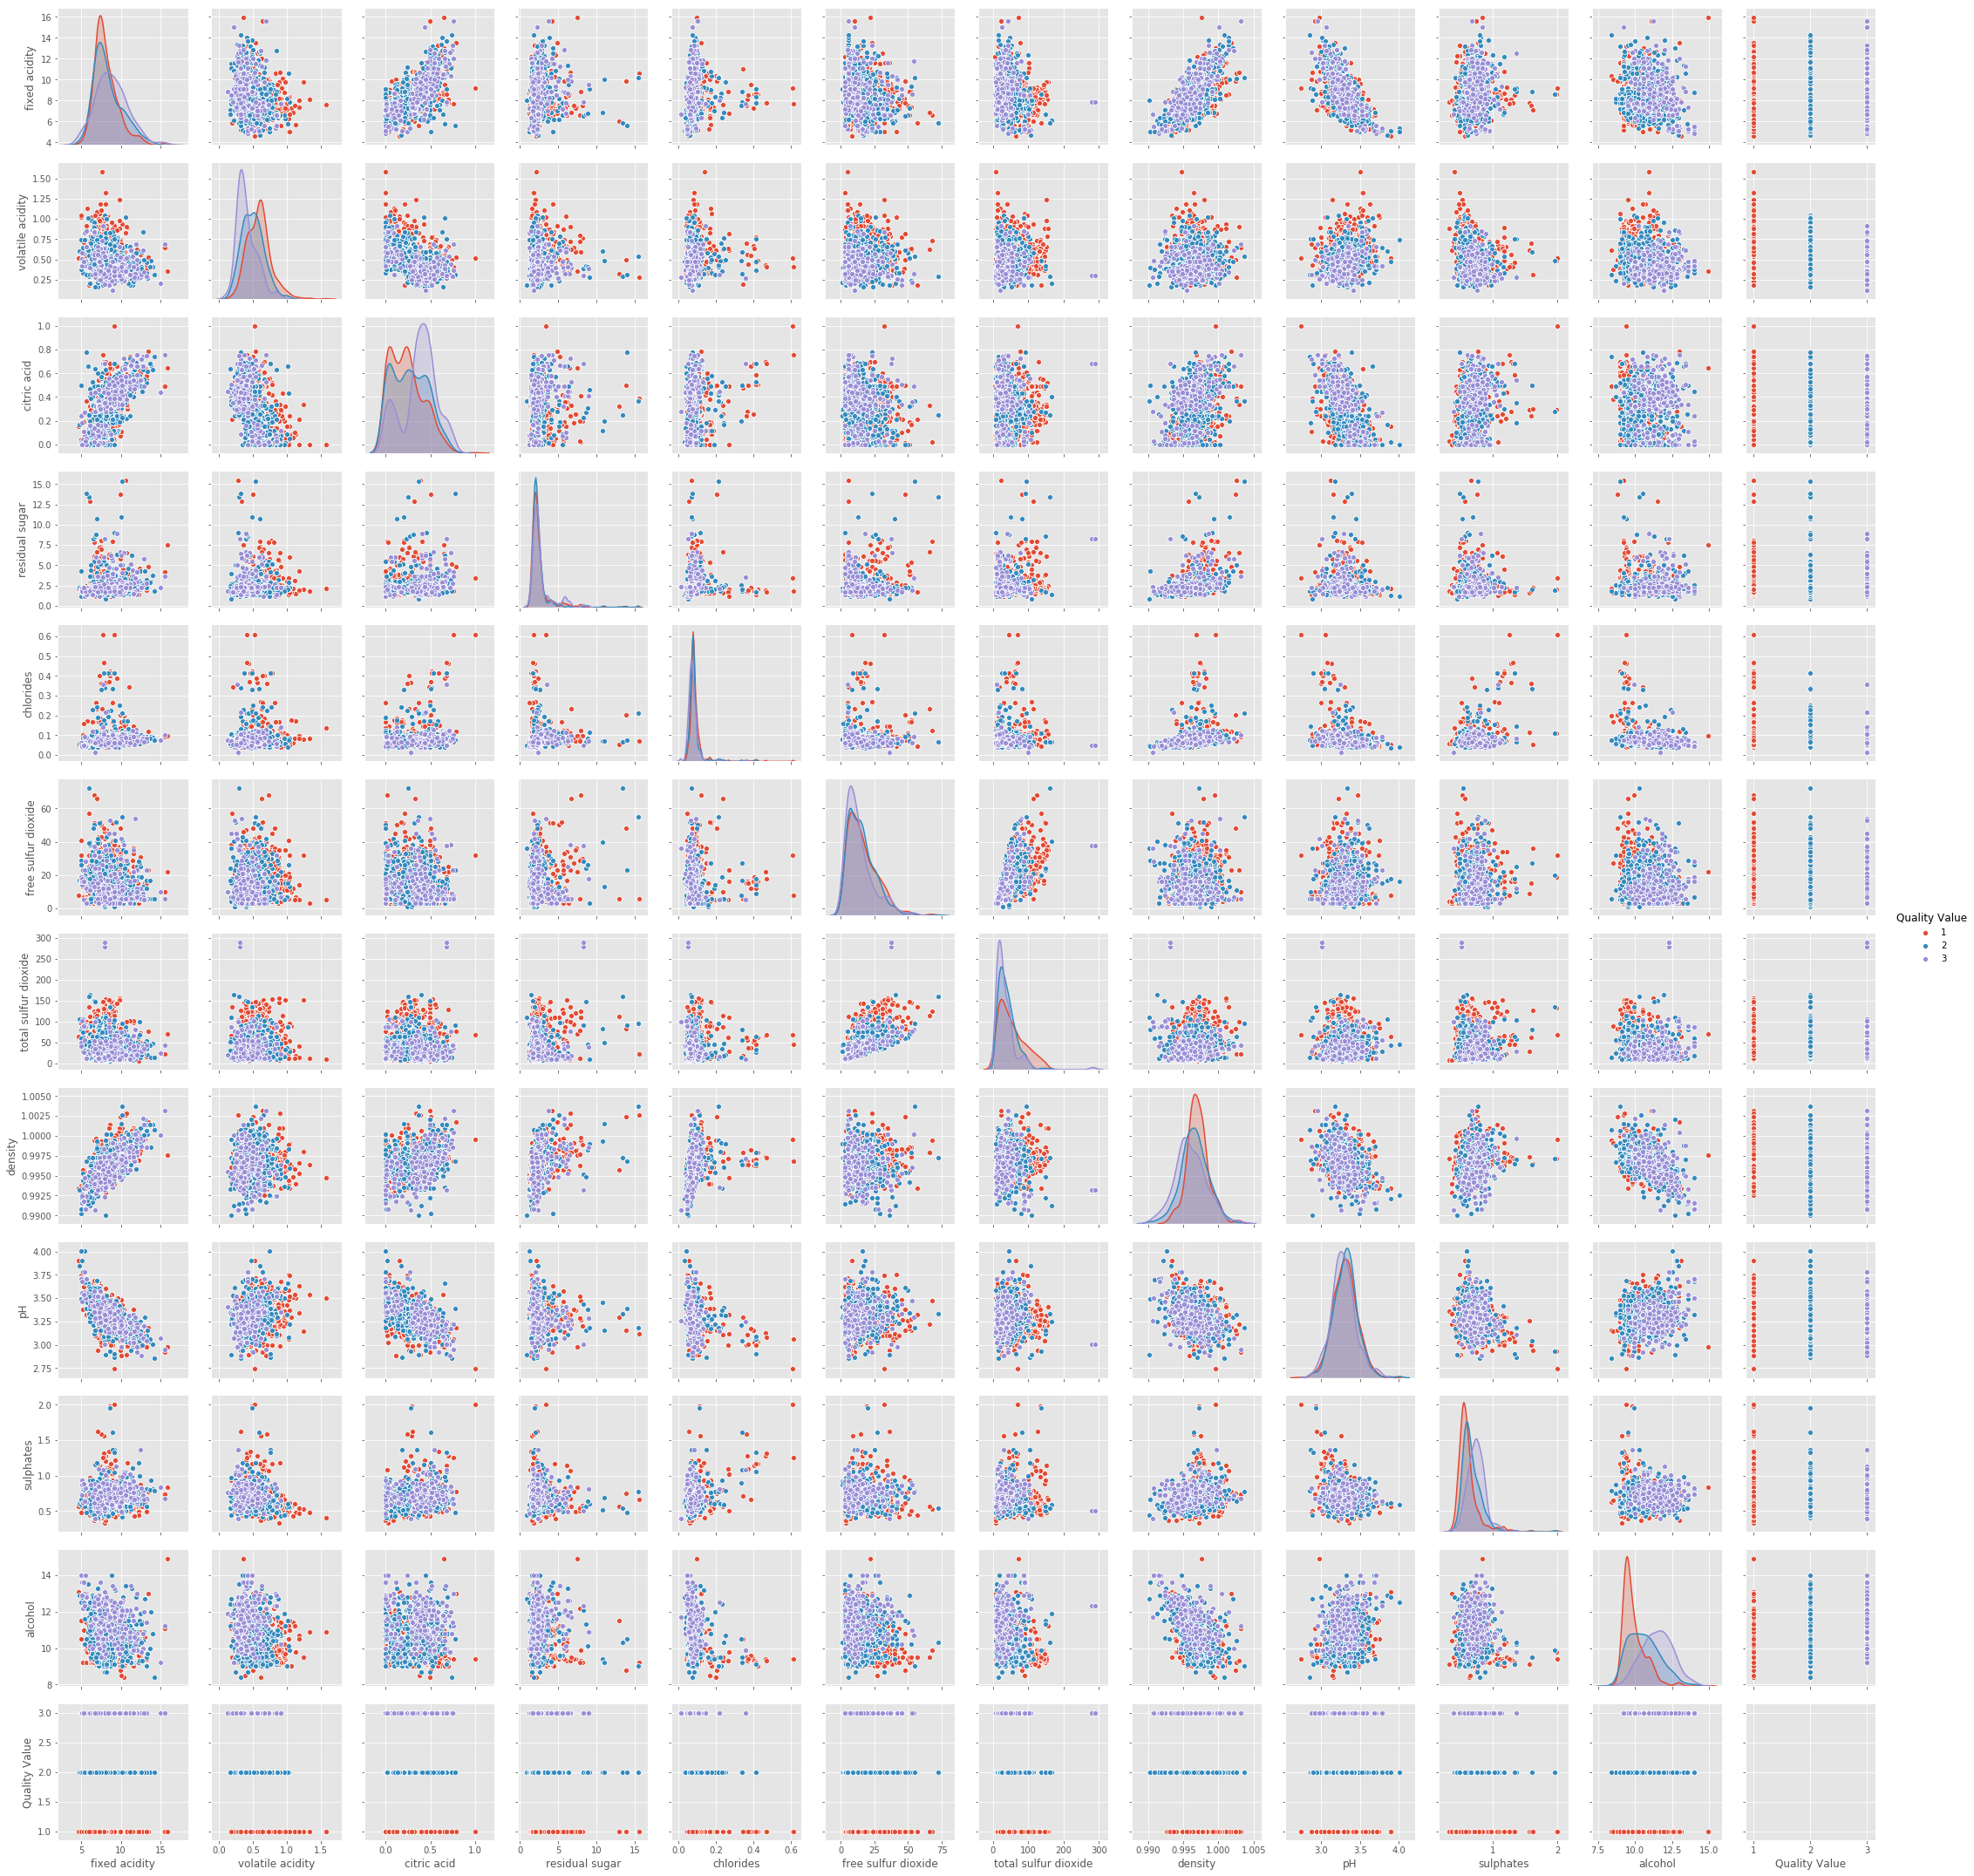

In [69]:
#Redo the pairplot with class Quality as hue
sns.pairplot(RWdatabins, hue = 'Quality Value')

#### From above, looks like Fixed Acidity, Density and alcohol add to quality

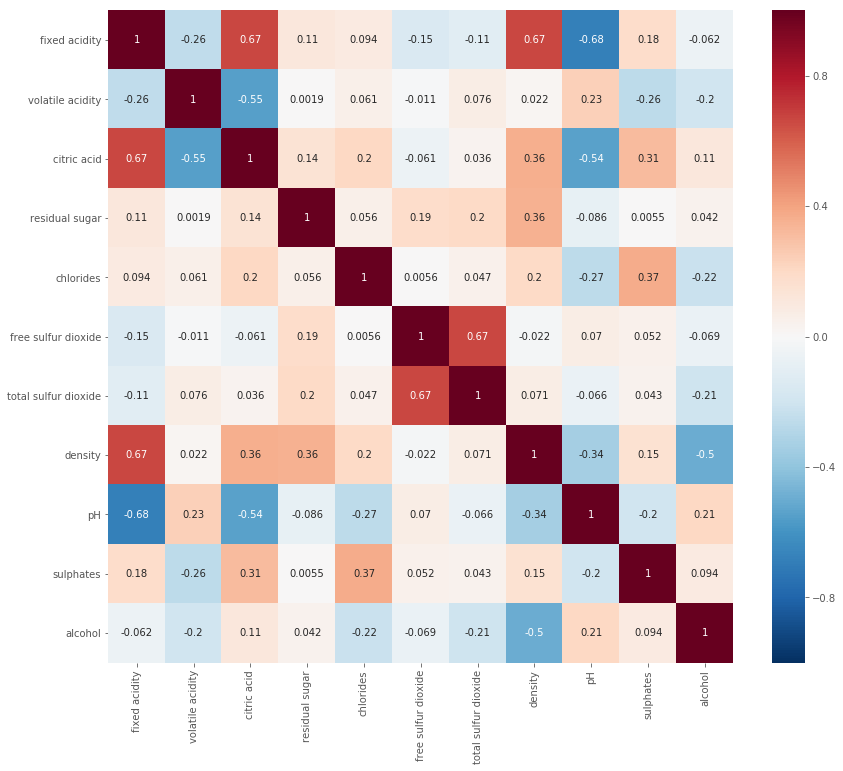

In [70]:
# Find correlatation heatmap using categorical Quality DF
RWcorr=RWdatabins.corr()
plt.figure(figsize=(14,12))
heatmap=sns.heatmap(RWcorr,annot=True,linewidths=0,vmin=-1,cmap='RdBu_r')

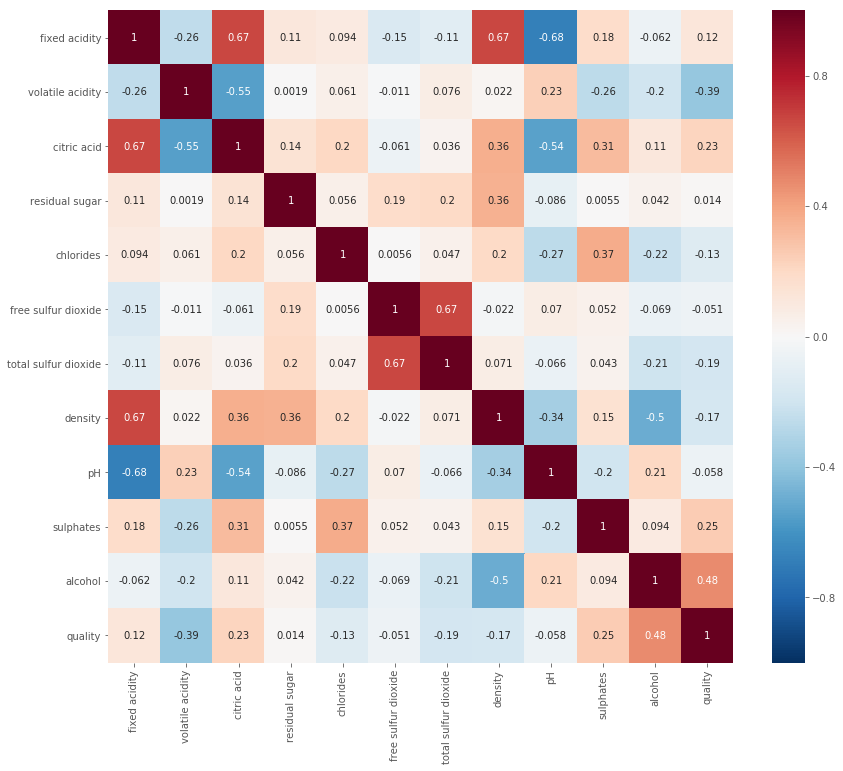

In [72]:
# Above did show some relationship among features. But cannot deduce for sure relationship to Quality.
# Let us try the original dataframe where quality is still a category but with more values
RWocorr=RWdata.corr()
plt.figure(figsize=(14,12))
heatmap=sns.heatmap(RWocorr,annot=True,linewidths=0,vmin=-1,cmap='RdBu_r')

In [20]:
RWdatabins['Quality Value']=RWdatabins['Quality Value'].astype(float)

#### To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s StandardScaler as the feature matrix is a mix of binary and continuous features . 

In [44]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.cluster import KMeans
#mms = MinMaxScaler()
#mms.fit(RWdatan)
#data_transformed = mms.transform(RWdatan)

In [73]:
from sklearn.preprocessing import StandardScaler, Normalizer
# center and scale the data
scaler = StandardScaler()
cols=RWdatabins.drop('Quality Value',axis=1).columns
RWdatanScaled = scaler.fit_transform(RWdatabins[cols])
#RWdatanScaled = scaler.fit_transform(RWdatan)
RWdatanScaled = pd.DataFrame(RWdatanScaled,columns=cols)

In [76]:

print("Before scaling:\n", RWdatabins[cols].describe())
print("\nAfter scaling:\n", np.round(RWdatanScaledn[cols].describe(),2))

Before scaling:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             

In [74]:
# We will now train for different models. We will use the 3 class dataframe.
#Stratified sampling aims at splitting one data set so that each split are similar with respect to something. 
#In a classification setting, it is often chosen to ensure that the train and test 
#sets have approximately the same percentage of samples of each target class as the complete set.
# We do not need to scale the Target as the spread of values is not wide

from sklearn.model_selection import train_test_split
X = RWdatanScaled
y = RWdatabins['Quality Value']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

#### Let us now try K NN Classification Algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('score on training set:', model.score(x_train, y_train))
print('score on test set:', model.score(x_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))


score on training set: 0.7447873227689742
score on test set: 0.5975
              precision    recall  f1-score   support

         1.0       0.65      0.69      0.67       186
         2.0       0.55      0.57      0.56       160
         3.0       0.51      0.35      0.42        54

   micro avg       0.60      0.60      0.60       400
   macro avg       0.57      0.54      0.55       400
weighted avg       0.59      0.60      0.59       400



In [56]:
# Accuracy is just 59%

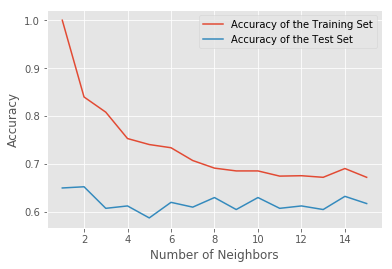

In [80]:
# Let us check what is the optimized value for n_neighbors
# We create two lists to keep training and test accuracies. We'll later use them to evaluate an 
# appropriate number of neighbors
training_accuracy = []
test_accuracy = []

# We define a range of 1 to 15 (included) neighbors that will be tested
neighbors_settings = range(1,16)

# We loop the KNN model through the range of possible neighbors to evaluate which one would be 
# appropriate for this analysis

for n_neighbors in neighbors_settings:
    
    # creating the KNN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fitting the model
    clf.fit(x_train, y_train)
    #recording the accuracy of the training set
    training_accuracy.append(clf.score(x_train, y_train))
    #recording the accuracy of the test set
    test_accuracy.append(clf.score(x_test, y_test))
    
# Data Visualization - Evaluating the accuracy of both the training and the testing sets against 
# n_neighbors
    
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

It looks like 6 is the optimal value for n_neighbors


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('score on training set:', model.score(x_train, y_train))
print('score on test set:', model.score(x_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

score on training set: 0.7289407839866555
score on test set: 0.6275
              precision    recall  f1-score   support

           1       0.69      0.76      0.72       186
           2       0.60      0.54      0.57       160
           3       0.45      0.43      0.44        54

   micro avg       0.63      0.63      0.63       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.62      0.63      0.62       400



In [93]:
# Accuracy 62%, not much difference.

#### Now let us try Decision Tree Classifier

In [84]:
from sklearn.model_selection import train_test_split
X = RWdatanScaled
y = RWdatabins['Quality Value']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [85]:
from sklearn.tree import DecisionTreeClassifier    # Import decision tree classifier model using Entropy (Information Gain)

tree = DecisionTreeClassifier(criterion='entropy', # Initialize and fit classifier
    max_depth=4, random_state=1)
tree.fit(x_train, y_train)

y_prediction = tree.predict(x_test)

In [86]:
y_prediction

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 3,
       1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1,
       1, 1, 2, 2, 2, 3, 1, 3, 2, 1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1,
       3, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 3, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 2,

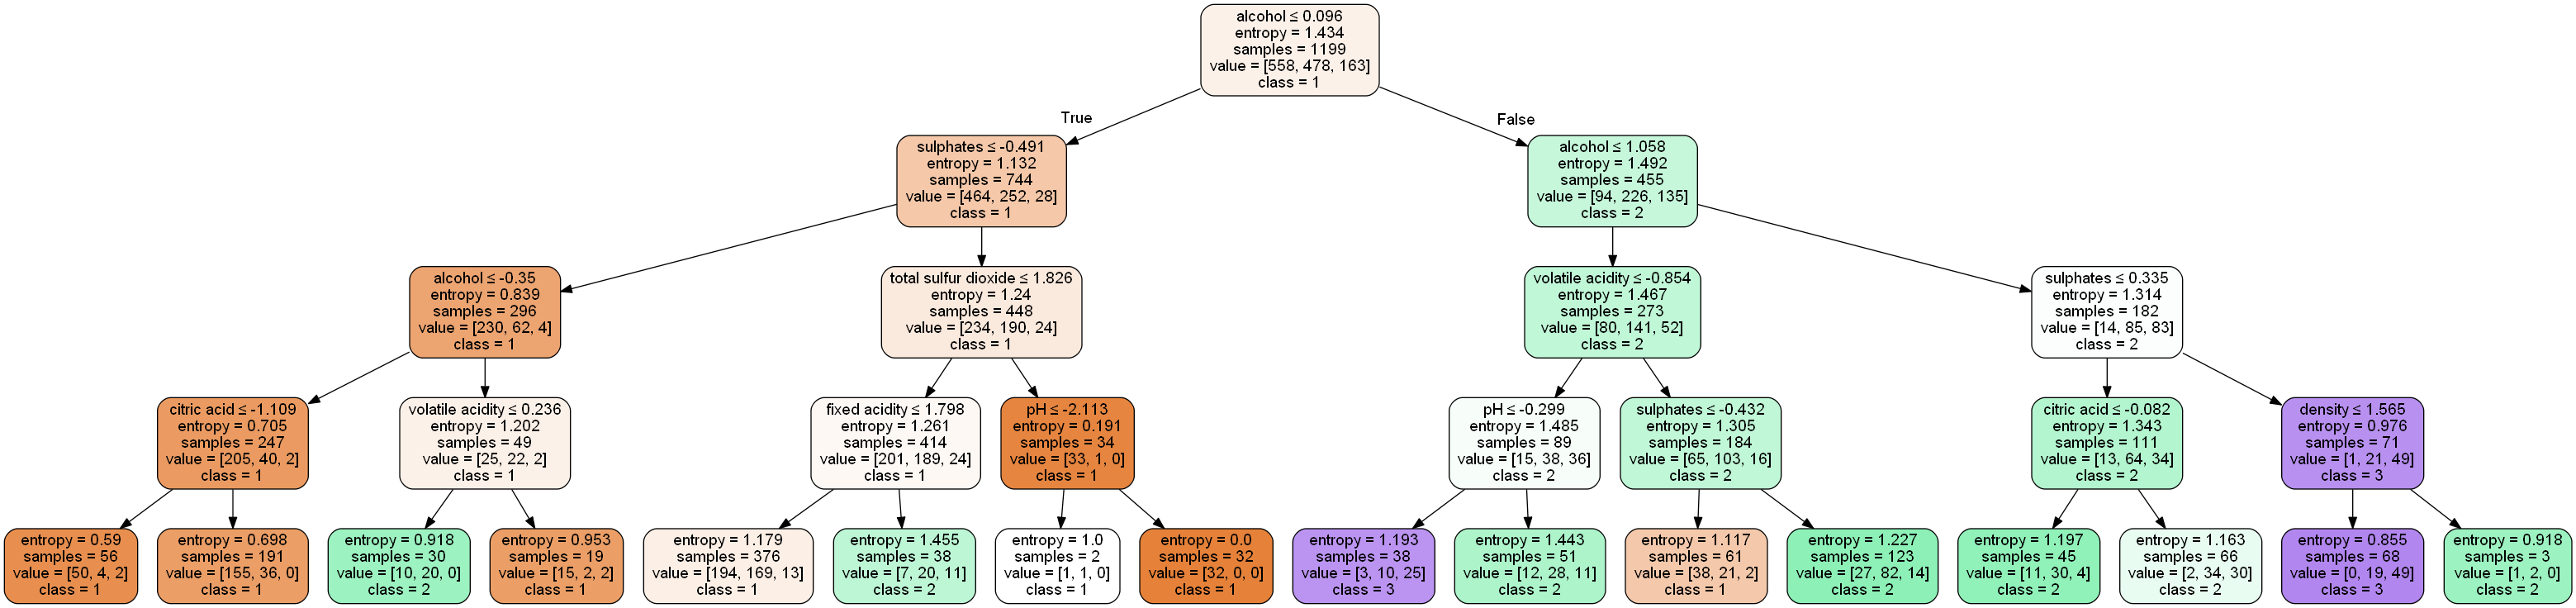

In [87]:
import pydotplus
import subprocess
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import subprocess
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#This allows us to make a decision tree real fast directly in the notebook!
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,  
                    feature_names=x_train.columns.tolist(),class_names=['1','2','3'],  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           1       0.65      0.85      0.74       186
           2       0.60      0.46      0.52       160
           3       0.61      0.41      0.49        54

   micro avg       0.63      0.63      0.63       400
   macro avg       0.62      0.57      0.58       400
weighted avg       0.63      0.63      0.62       400



Accuracy is 63%

###### Since the Accuracy is still 63%, let us try Regression Decision Tree


In [89]:
decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(x_train,y_train)
y_prediction = decision_tree.predict(x_test)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(y_test, y_prediction)))

Decision Tree RMSE: 0.604928865693536


#### Conclusion: 
By categorising the target into 3 classes, the model with the available sample only allows us accuracy of 59-63%.
Either we get more data or try using original data set without categorizing the Quality Target.